In [10]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import numpy as np

In [11]:
def f_beta(precision, recall, beta=2):
    if (beta**2 * precision) + recall == 0:
        return 0
    return ((1 + beta**2) * precision * recall
                ) / ((beta**2 * precision) + recall)

In [12]:
def plot_threshold_results(data):
    colors = sns.color_palette("husl", 3)
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    thresholds = [float(t) for t in data.keys()]
    f1s = [f_beta(float(d['precision']), float(d['recall'])) for d in data.values()]
    recalls = [d['recall'] for d in data.values()]
    precisions = [d['precision'] for d in data.values()]

    data = {
        "F-β": f1s,
        "Recall": recalls,
        "Precision": precisions,
    }

    for i, (label, scores) in enumerate(data.items()):
        # Plot the losses
        ax.plot(thresholds, scores, color=colors[i], label=label)
        ax.set_title('Loss per Epoch')
        ax.set_xlabel('Threshold')
        ax.set_ylabel('Score')
        ax.set_xticks(np.arange(0, 1, 0.1))
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Find the first threshold where the precision is above 0.9
    threshold_index = next((i for i, precision in enumerate(precisions) if precision > 0.9), None)
    if threshold_index is not None:
        threshold = thresholds[threshold_index]
        ax.axvline(threshold, color='black', linestyle='--')
        ax.text(threshold + 0.01, 0.8, f"Threshold = {threshold:.3f}", fontsize=12)

    ax.legend()
    plt.tight_layout(pad=3)
    plt.show()


In [13]:
def table_threshold_results(data):
    table = PrettyTable()
    table.field_names = ["", "Threshold", "F-Beta", "Recall", "Precision"]

    threshold_index = next((i for i, precision in enumerate(
        [d['precision'] for d in data.values()]) if precision > 0.9), None)

    for i, (threshold, scores) in enumerate(data.items()):
        f_beta = scores['f_beta']
        recall = scores['recall']
        precision = scores['precision']

        if i == threshold_index:
            table.add_row(["\u2192", '\033[1m' + str(threshold) + '\033[0m', '\033[1m' + str(f_beta) + '\033[0m',
                          '\033[1m' + str(recall) + '\033[0m', '\033[1m' + str(precision) + '\033[0m'])
        else:
            table.add_row(["", threshold, f_beta, recall, precision])

    print(table)

In [14]:
def plot_curves(data):
    thresholds = [float(key) for key in data.keys()]
    precision = [data[str(threshold)]['precision'] for threshold in thresholds]
    recall = [data[str(threshold)]['recall'] for threshold in thresholds]
    tpr = [data[str(threshold)]['tpr'] for threshold in thresholds]
    fpr = [data[str(threshold)]['fpr'] for threshold in thresholds]

    sns.set(style='darkgrid')
    plt.figure(figsize=(8, 4))

    # Plot ROC curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True)

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

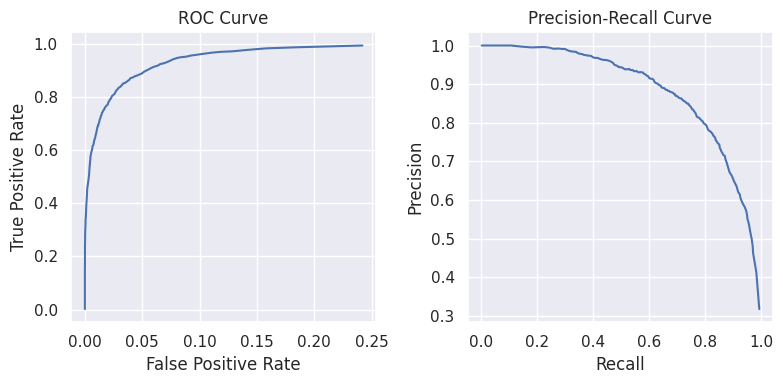

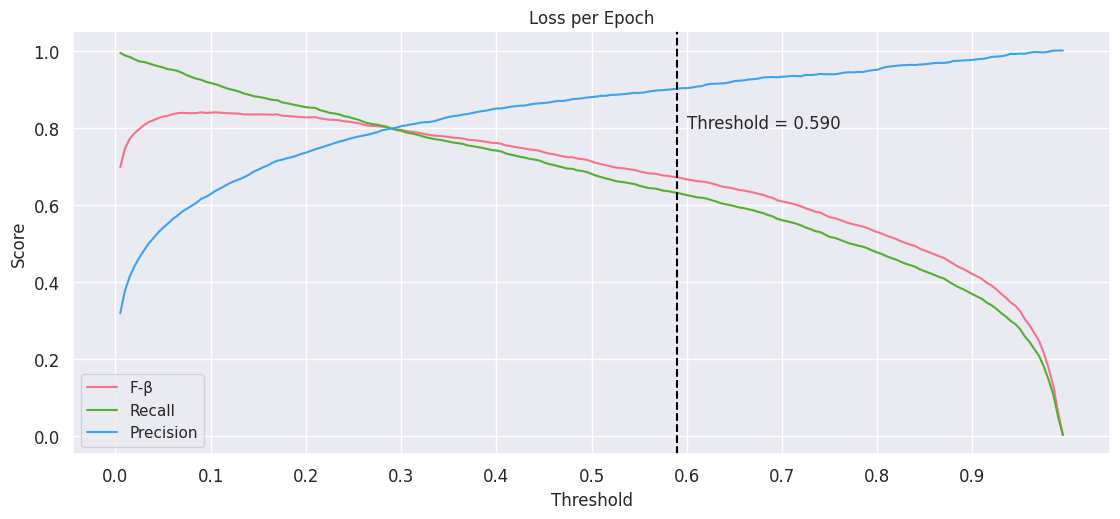

In [15]:
threshold_data = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-30/checkpoints/converted/epoch=0_threshold_results.json'
with open(threshold_data, 'r') as f:
    data = json.load(f)['JIGSAW']

plot_curves(data)
plot_threshold_results(data)
# table_threshold_results(data)

In [16]:
def table_results(json_paths):
    results = {}
    for ratio, json_path in json_paths.items():
        with open(json_path, 'r') as f:
            data = json.load(f)

            threshold_index = next((i for i, precision in enumerate([d['precision'] for d in data['JIGSAW'].values()]) if precision > 0.9), None)
            threshold = list(data['JIGSAW'].keys())[threshold_index]
            results[ratio] = "{:5.3f}".format(float(threshold))

    table = PrettyTable()
    table.field_names = ["Data Ratio", "Threshold"]
    print("Jigsaw Results")
    for ratio, threshold in results.items():
        table.add_row([ratio, threshold])
    print(table)

In [17]:
ratios = {
    "100:100:0.1": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-0_1/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:1": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-1/checkpoints/converted/epoch=2_threshold_results.json',
    "100:100:5": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-5/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:10": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-10/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:20": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-20/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:25": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-25/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:30": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-30/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:40": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-40/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:50": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-50/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:60": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-60/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:70": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-70/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:75": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-75/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:80": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-80/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:90": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-90/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:100": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-100/checkpoints/converted/epoch=0_threshold_results.json',
}

table_results(ratios)

Jigsaw Results
+-------------+-----------+
|  Data Ratio | Threshold |
+-------------+-----------+
| 100:100:0.1 |   0.825   |
|  100:100:1  |   0.540   |
|  100:100:5  |   0.615   |
|  100:100:10 |   0.635   |
|  100:100:20 |   0.765   |
|  100:100:25 |   0.835   |
|  100:100:30 |   0.670   |
|  100:100:40 |   0.770   |
|  100:100:50 |   0.660   |
|  100:100:60 |   0.645   |
|  100:100:70 |   0.690   |
|  100:100:75 |   0.705   |
|  100:100:80 |   0.775   |
|  100:100:90 |   0.710   |
| 100:100:100 |   0.695   |
+-------------+-----------+


In [18]:
topics = {
    "Topic 4": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-4/lightning_logs/blank-100-1/checkpoints/converted/epoch=3_threshold_results.json',
    "Topic 6": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-1/checkpoints/converted/epoch=2_threshold_results.json',
    "Topic 7": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-7/lightning_logs/blank-100-1/checkpoints/converted/epoch=2_threshold_results.json',
    "Topic 10": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-10/lightning_logs/blank-100-1/checkpoints/converted/epoch=2_threshold_results.json',
}

table_results(topics)


Jigsaw Results
+------------+-----------+
| Data Ratio | Threshold |
+------------+-----------+
|  Topic 4   |   0.580   |
|  Topic 6   |   0.540   |
|  Topic 7   |   0.550   |
|  Topic 10  |   0.565   |
+------------+-----------+


In [19]:
ratios = {
    "100:100:1": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary-SL/lightning_logs/blank-100-1/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:5": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary-SL/lightning_logs/blank-100-5/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:10": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary-SL/lightning_logs/blank-100-10/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:25": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary-SL/lightning_logs/blank-100-25/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:50": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary-SL/lightning_logs/blank-100-50/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:75": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary-SL/lightning_logs/blank-100-75/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:100": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary-SL/lightning_logs/blank-100-100/checkpoints/converted/epoch=0_threshold_results.json',
}

table_results(ratios)

Jigsaw Results
+-------------+-----------+
|  Data Ratio | Threshold |
+-------------+-----------+
|  100:100:1  |   0.625   |
|  100:100:5  |   0.655   |
|  100:100:10 |   0.665   |
|  100:100:25 |   0.835   |
|  100:100:50 |   0.665   |
|  100:100:75 |   0.665   |
| 100:100:100 |   0.595   |
+-------------+-----------+


In [20]:
ratios = {
    "100:100:1": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-1/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:5": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-5/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:10": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-10/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:20": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-20/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:25": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-25/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:30": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-30/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:40": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-40/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:50": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-50/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:60": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-60/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:70": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-70/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:75": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-75/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:80": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-80/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:90": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-90/checkpoints/converted/epoch=0_threshold_results.json',
    "100:100:100": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Secondary/lightning_logs/blank-100-100/checkpoints/converted/epoch=0_threshold_results.json',
}

table_results(ratios)

Jigsaw Results
+-------------+-----------+
|  Data Ratio | Threshold |
+-------------+-----------+
|  100:100:1  |   0.615   |
|  100:100:5  |   0.615   |
|  100:100:10 |   0.500   |
|  100:100:20 |   0.745   |
|  100:100:25 |   0.870   |
|  100:100:30 |   0.590   |
|  100:100:40 |   0.795   |
|  100:100:50 |   0.685   |
|  100:100:60 |   0.780   |
|  100:100:70 |   0.665   |
|  100:100:75 |   0.720   |
|  100:100:80 |   0.865   |
|  100:100:90 |   0.725   |
| 100:100:100 |   0.640   |
+-------------+-----------+
